# Mini Proyecto 2




## Solución cerrada de regresión lineal

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
np.random.seed(4)

In [3]:
u = np.random.uniform(-2,5,size=100)
x = 3*np.random.rand(100)
y = 5 + 2*x + u

<AxesSubplot:>

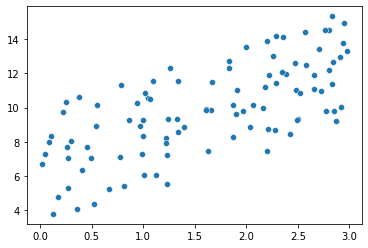

In [4]:
sns.scatterplot(x=x, y=y)

In [5]:
X = np.c_[np.ones((100,1)), x]
beta = np.linalg.inv(X.T@X)@X.T@y
beta

array([6.64489689, 1.99641277])

In [6]:
b_0, b_1 = beta
y_pred= b_1*x + b_0

In [7]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_true=y,y_pred=y_pred)

3.6595133440506427

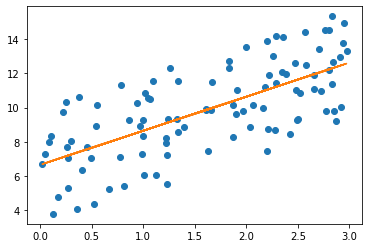

In [8]:
b_0, b_1 = beta
plt.plot(x, y, 'o')
plt.plot(x, b_1*x + b_0)

## Regresión Polinomial

In [9]:
datos = pd.read_csv('ts.csv')
datos

,tiempo,magnitud
828,0.332508,-0.475521
426,-0.543721,-0.591832
208,-1.009149,0.664333
207,-1.009334,0.582915
158,-1.080630,-0.572447
...,...,...
1087,1.372963,-1.208284
820,0.299023,-0.777931
1070,1.287071,-0.041291
928,0.691556,1.734400


In [10]:
df = datos.sample(200)
df

,tiempo,magnitud
842,0.393486,0.807784
886,0.554936,2.560213
909,0.624764,0.338661
388,-0.609157,-0.440627
830,0.346872,-0.704267
...,...,...
755,0.103805,-0.328193
109,-1.153067,-0.266160
315,-0.834440,0.241734
33,-1.378429,-1.088095


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 842 to 681
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tiempo    200 non-null    float64
 1   magnitud  200 non-null    float64
dtypes: float64(2)
memory usage: 4.7 KB


<AxesSubplot:xlabel='tiempo', ylabel='magnitud'>

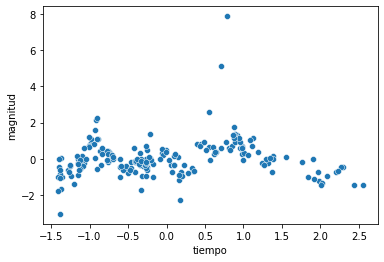

In [12]:
sns.scatterplot(x='tiempo', y='magnitud', data=df)

In [13]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [14]:
X = df.tiempo.values
y = df.magnitud.values
X_= X.reshape(-1,1)
X_.sort(axis=0)
reg5 = LinearRegression()
reg7 = LinearRegression()
reg10 = LinearRegression()

In [15]:
poly_5 = PolynomialFeatures(5)
poly_7 = PolynomialFeatures(7)
poly_10 = PolynomialFeatures(10)

In [16]:
polydata_5 = poly_5.fit_transform(X_)
polydata_7 = poly_7.fit_transform(X_)
polydata_10 = poly_10.fit_transform(X_)

In [17]:
polyreg_5 = reg5.fit(polydata_5,y)
polyreg_7 = reg7.fit(polydata_7,y)
polyreg_10 = reg10.fit(polydata_10,y)

In [18]:
pred_5 = polyreg_5.predict(polydata_5)
pred_7 = polyreg_7.predict(polydata_7) 
pred_10 = polyreg_10.predict(polydata_10)

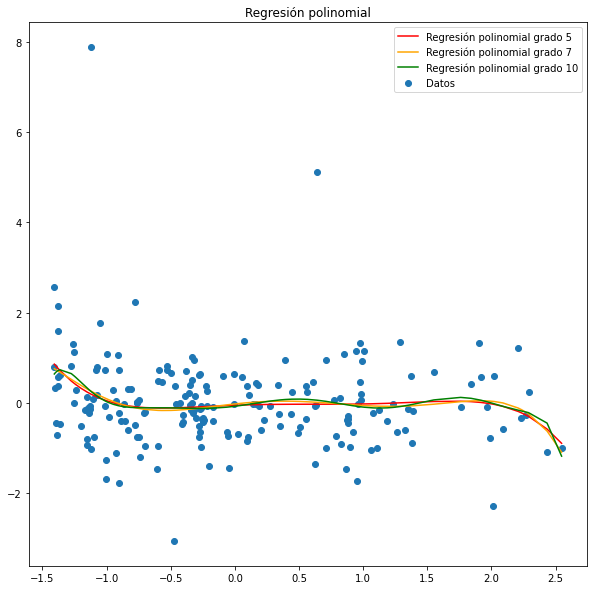

In [19]:
plt.figure(figsize=(10,10))
plt.scatter(X_,y, label = "Datos")
plt.plot(X_,pred_5,color="red", label="Regresión polinomial grado 5")
plt.plot(X_,pred_7,color="orange", label="Regresión polinomial grado 7")
plt.plot(X_,pred_10,color="green", label="Regresión polinomial grado 10")
plt.title("Regresión polinomial")
plt.legend();
plt.show()

In [20]:
error1 = mean_squared_error(y,pred_5)
error2 = mean_squared_error(y,pred_7)
error3 = mean_squared_error(y,pred_10)
print(f"MSE Regresión grado 5:   {error1}")
print(f"MSE Regresión grado 7:   {error2}")
print(f"MSE Regresión grado 10:   {error3}")

MSE Regresión grado 5:   1.0091003099657996
MSE Regresión grado 7:   1.0066366291374433
MSE Regresión grado 10:   1.004661489649092


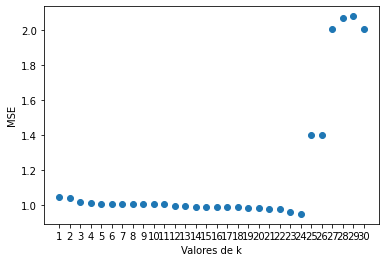

In [21]:
#realizamos un análisis con polinomios de grado de 1 al 30 

rango = np.arange(1, 31)
accuracy = []
for k in rango:
    poly_k = PolynomialFeatures(k)
    polydata_k = poly_k.fit_transform(X_)
    reg_k = LinearRegression()
    polyreg_k = reg_k.fit(polydata_k,y)
    accuracy.append(mean_squared_error(y,polyreg_k.predict(polydata_k)))
plt.figure()
plt.xlabel('Valores de k')
plt.ylabel('MSE')
plt.scatter(rango, accuracy)
plt.xticks(rango)
plt.show();

Podemos ver que el mejor ajuste (bajo la métrica MSE) lo hará un polinomio de grado 24 y a partir del grado 25 el error aumenta considerablemente

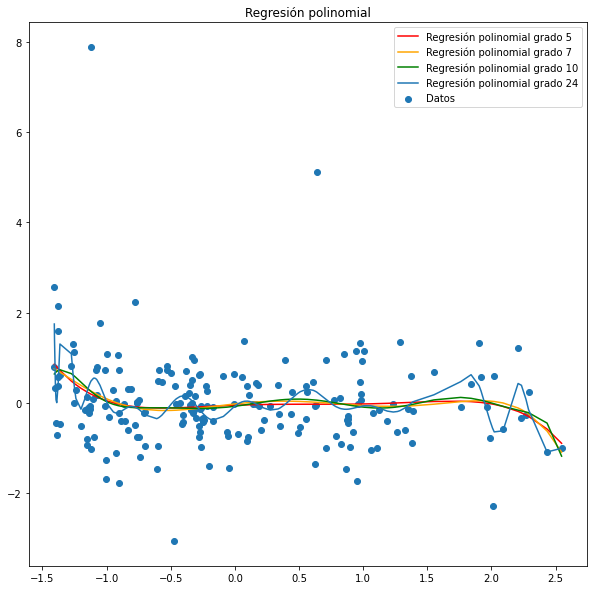

In [22]:
# Graficamos nuevamente con el polinomio de grado 24 incluido
k=24
poly_k = PolynomialFeatures(k)
polydata_k = poly_k.fit_transform(X_)
reg_k = LinearRegression()
polyreg_k = reg_k.fit(polydata_k,y)  
plt.figure(figsize=(10,10))
plt.scatter(X_,y, label = "Datos")
plt.plot(X_,pred_5,color="red", label="Regresión polinomial grado 5")
plt.plot(X_,pred_7,color="orange", label="Regresión polinomial grado 7")
plt.plot(X_,pred_10,color="green", label="Regresión polinomial grado 10")
plt.plot(X_,polyreg_k.predict(polydata_k), label= "Regresión polinomial grado 24")
plt.title("Regresión polinomial")
plt.legend()
plt.show()


## Regresión con penalización

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

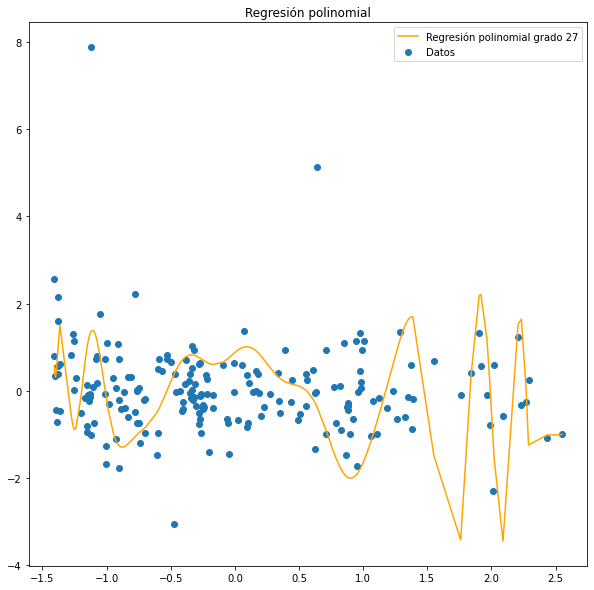

MSE Regresión grado 27: 2.00870089309485


In [24]:
poly = PolynomialFeatures(27) # usamos un polinomio de grado muy alto para reajustarlo a un modelo de penalizacion mejore su rendimiento
datos_poly = poly.fit_transform(X_)
reg_27 = LinearRegression()
polyreg_27 = reg_27.fit(datos_poly,y) 
#graficamos
plt.figure(figsize=(10,10))
plt.scatter(X_,y, label = "Datos")
plt.plot(X_,polyreg_27.predict(datos_poly), c= "orange",label= "Regresión polinomial grado 27")
plt.title("Regresión polinomial")
plt.legend();
plt.show() 
print(f"MSE Regresión grado 27: {mean_squared_error(y,polyreg_27.predict(datos_poly))}")

In [25]:
#Lasso

l1 = Lasso(alpha = 1,normalize=False)
l2 = Lasso(alpha = 0.1,normalize=False)
l3 = Lasso(alpha = 0.00001,normalize=False)
l1.fit(datos_poly,y)
l2.fit(datos_poly,y)
l3.fit(datos_poly,y)

C:\Users\iaace\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 105.17908630279571, tolerance: 0.021233347026662044
  model = cd_fast.enet_coordinate_descent(
C:\Users\iaace\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 102.82025945731037, tolerance: 0.021233347026662044
  model = cd_fast.enet_coordinate_descent(
C:\Users\iaace\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 100.71438092016705, tolerance: 0.021233347026662044
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=1e-05)

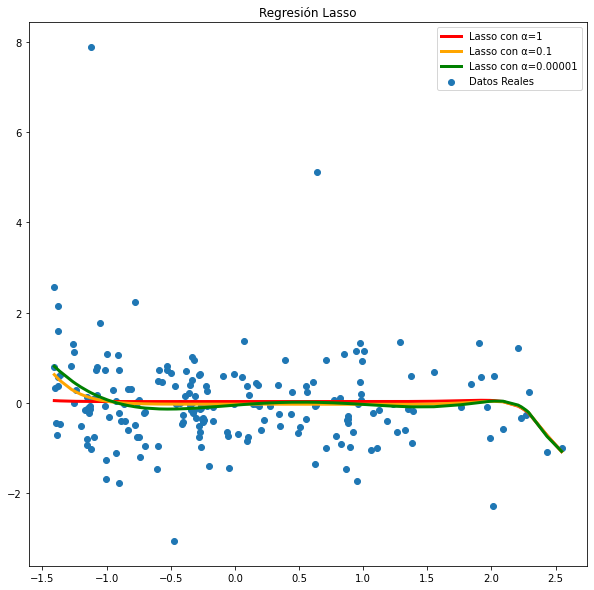

In [26]:
plt.figure(figsize=(10,10))
plt.scatter(X_,y,label='Datos Reales')
plt.plot(X_, l1.predict(datos_poly), color='red', label='Lasso con α=1', lw=3);
plt.plot(X_, l2.predict(datos_poly), label='Lasso con α=0.1', color='orange', lw=3)
plt.plot(X_, l3.predict(datos_poly), label='Lasso con α=0.00001', color='green', lw=3)
plt.legend();
plt.title('Regresión Lasso');


In [27]:
errorl1 = mean_squared_error(y,l1.predict(datos_poly))
errorl2 = mean_squared_error(y,l2.predict(datos_poly))
errorl3 = mean_squared_error(y,l3.predict(datos_poly))
print(f"MSE Lasso con α=1:   {errorl1}")
print(f"MSE Lasso con α=0.1:   {errorl2}")
print(f"MSE Lasso con α=0.00001:   {errorl3}")

MSE Lasso con α=1:   1.0506806684471457
MSE Lasso con α=0.1:   1.0152247956339644
MSE Lasso con α=0.00001:   1.0071291458468696


Notamos que mientras mas bajo el nivel de penalización, mejor es el rendimiento del modelo. Recordemos que Lasso tiene la capacidad de eliminar predictores que no son relevantes para nuestro modelo.

In [28]:
#Ridge
r1 = Ridge(alpha = 1,normalize=False)
r2 = Ridge(alpha = 0.1,normalize=False)
r3 = Ridge(alpha = 0.00001,normalize=False)
r1.fit(datos_poly,y)
r2.fit(datos_poly,y)
r3.fit(datos_poly,y)

Ridge(alpha=1e-05)

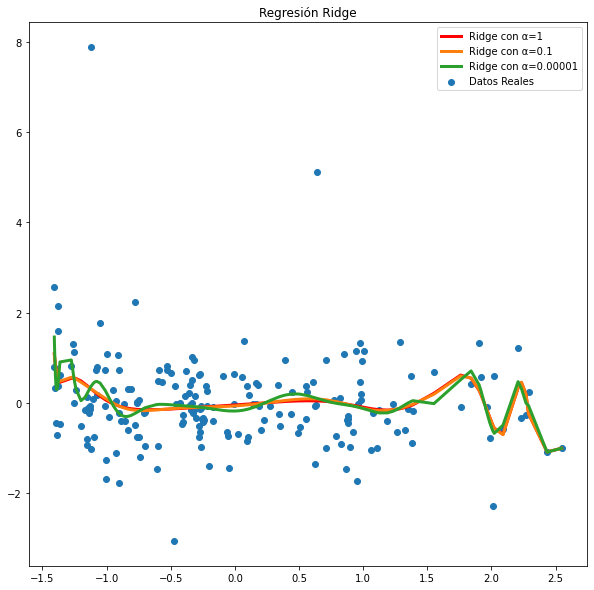

In [29]:
plt.figure(figsize=(10,10))
plt.scatter(X_,y,label='Datos Reales')
plt.plot(X_, r1.predict(datos_poly), 'r',label='Ridge con α=1', lw=3);
plt.plot(X_, r2.predict(datos_poly), label='Ridge con α=0.1', c='C1', lw=3)
plt.plot(X_, r3.predict(datos_poly), label='Ridge con α=0.00001', c='C2', lw=3)
plt.legend();
plt.title('Regresión Ridge');

In [30]:
error_r1 = mean_squared_error(y,r1.predict(datos_poly))
error_r2 = mean_squared_error(y,r2.predict(datos_poly))
error_r3 = mean_squared_error(y,r3.predict(datos_poly))
print(f"MSE Ridge con α=1:   {error_r1}")
print(f"MSE Ridge con α=0.1:   {error_r2}")
print(f"MSE Ridge con α=0.00001:   {error_r3}")

MSE Ridge con α=1:   0.9875384311128204
MSE Ridge con α=0.1:   0.9848677187435174
MSE Ridge con α=0.00001:   0.9654085987585873


De manera similar a Lasso, en la regresión Ridge se cumple que mientras mas bajo el nivel de penalización, mejor es el rendimiento del modelo. La regresión Ridge cuando existen predictores altamente correlacionados (linealmente) los elimina de forma proporcional a diferencia de Lasso que tiende a darles importancia a la hora de hacer la predicción. 

A modo de conclusión, la regresión Ridge es la que se ajusta mejor a estos datos.

#### Finalmente graficamos los mejores resultados 

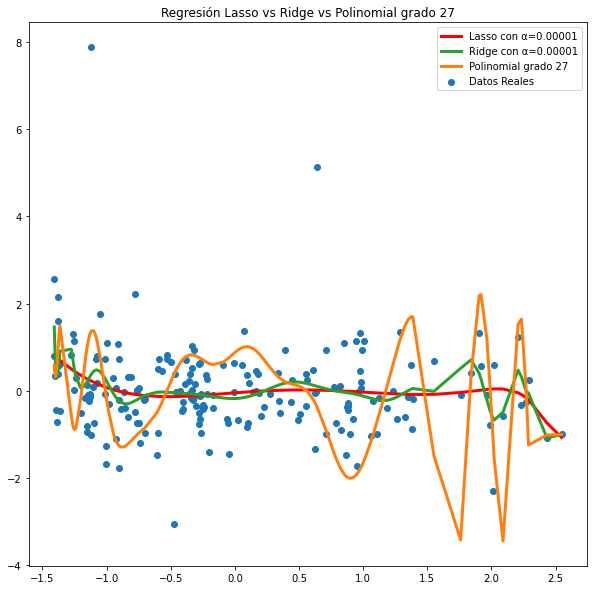

In [31]:
plt.figure(figsize=(10,10))
plt.scatter(X_,y,label='Datos Reales')
plt.plot(X_, l3.predict(datos_poly), 'r',label='Lasso con α=0.00001', lw=3);
plt.plot(X_, r3.predict(datos_poly), label='Ridge con α=0.00001', c='C2', lw=3)
plt.plot(X_, polyreg_27.predict(datos_poly), label='Polinomial grado 27', c='C1', lw=3)
plt.legend();
plt.title('Regresión Lasso vs Ridge vs Polinomial grado 27');

## Clasificación de estrellas variables

In [32]:
data = pd.read_csv('ts2.csv')

In [33]:
data

,Class,Amplitude,AndersonDarling,Autocor_length,Beyond1Std,Gskew,LinearTrend,MaxSlope,Mean,Meanvariance,MedianAbsDev,MedianBRP,PercentAmplitude,PeriodLS
0,lpv,0.02700,0.000000,3,0.270000,0.0190,-0.000007,0.130305,14.270917,0.000995,0.0090,0.533333,0.004906,17.880565
1,lpv,0.21400,0.000000,18,0.346667,0.1260,0.000001,0.010560,13.696013,0.008650,0.0975,0.240000,0.026910,0.997859
2,ecl,0.27050,0.000000,1,0.223333,0.2320,-0.000010,0.319591,19.368090,0.006736,0.0710,0.530000,0.027474,2.534404
3,lpv,0.34250,0.000000,13,0.396667,-0.0170,-0.000090,0.664452,14.216857,0.013279,0.1515,0.250000,0.029652,117.161715
4,lpv,0.01075,0.097155,1,0.313830,-0.0020,-0.000002,0.105675,13.609633,0.000410,0.0040,0.494681,0.001470,7.655264
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,lpv,0.04000,0.112777,2,0.340000,0.0040,-0.000014,1.689189,13.335943,0.001613,0.0155,0.420000,0.004724,17.743225
4996,lpv,0.21250,0.000000,50,0.463333,-0.0655,-0.000224,11.590296,14.113617,0.009283,0.1250,0.303333,0.018120,1375.234215
4997,lpv,0.02175,0.030271,4,0.333333,0.0100,-0.000031,0.014262,14.477476,0.000819,0.0090,0.295238,0.002141,1111.578564
4998,lpv,0.02650,0.446972,2,0.313333,0.0030,0.000013,0.140885,13.661500,0.000972,0.0090,0.430000,0.003221,2866.316360


In [34]:
data.isnull().sum() # verificamos si hay NaN's

Class               0
Amplitude           0
AndersonDarling     0
Autocor_length      0
Beyond1Std          0
Gskew               0
LinearTrend         0
MaxSlope            0
Mean                0
Meanvariance        0
MedianAbsDev        0
MedianBRP           0
PercentAmplitude    0
PeriodLS            0
dtype: int64

In [35]:
data.info() # exploramos las variables del dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Class             5000 non-null   object 
 1   Amplitude         5000 non-null   float64
 2   AndersonDarling   5000 non-null   float64
 3   Autocor_length    5000 non-null   int64  
 4   Beyond1Std        5000 non-null   float64
 5   Gskew             5000 non-null   float64
 6   LinearTrend       5000 non-null   float64
 7   MaxSlope          5000 non-null   float64
 8   Mean              5000 non-null   float64
 9   Meanvariance      5000 non-null   float64
 10  MedianAbsDev      5000 non-null   float64
 11  MedianBRP         5000 non-null   float64
 12  PercentAmplitude  5000 non-null   float64
 13  PeriodLS          5000 non-null   float64
dtypes: float64(12), int64(1), object(1)
memory usage: 547.0+ KB


In [36]:
data.describe() # analizamos cada una de las columnas

,Amplitude,AndersonDarling,Autocor_length,Beyond1Std,Gskew,LinearTrend,MaxSlope,Mean,Meanvariance,MedianAbsDev,MedianBRP,PercentAmplitude,PeriodLS
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.106905,0.130491,4.545400,0.317532,0.016345,0.000001,2.175457,14.988370,0.003703,0.039180,0.414658,0.010616,302.831851
std,0.147896,0.202838,6.121163,0.060427,0.126287,0.000684,9.423721,1.889971,0.005527,0.062624,0.122715,0.014490,944.665723
min,0.007000,0.000000,1.000000,0.070470,-1.763000,-0.016436,0.006402,11.666225,0.000259,0.002000,0.069444,0.000893,0.005627
25%,0.021000,0.000016,1.000000,0.290000,-0.004000,-0.000015,0.096856,13.608853,0.000743,0.007000,0.336667,0.002375,0.987460
50%,0.043500,0.020842,2.000000,0.318182,0.002500,-0.000002,0.342336,14.514339,0.001596,0.014000,0.411089,0.004850,18.144685
75%,0.143500,0.185764,5.000000,0.348214,0.017000,0.000009,1.038683,15.592764,0.005258,0.051500,0.480000,0.014186,189.760635
max,1.700500,0.980413,70.000000,0.536667,1.479000,0.033689,335.151515,21.099524,0.075959,1.025000,0.922034,0.171519,12870.875640


Buscaremos predecir la columna "Class", para ello usaremos distintos clasificadores 

In [37]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
X = data.drop(['Class'], axis=1)
y = label.fit_transform(data['Class'])

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.35,random_state=40)

In [40]:
len(X_train) , len(X_test) , len(y_train), len(y_test)

(3250, 1750, 3250, 1750)

#### Entrenaremos dos modelos: uno de Naive Bayes Gaussian y un Arbol de Decisión

In [41]:
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

In [42]:
model_1 = GaussianNB()
model_2 = DecisionTreeClassifier(max_depth=10)

In [43]:
model_1.fit(X_train,y_train)
model_2.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=10)

In [44]:
pred_train1 = model_1.predict(X_train) 
pred_test1 = model_1.predict(X_test)
pred_train2 = model_2.predict(X_train) 
pred_test2 = model_2.predict(X_test)

In [45]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [46]:
# Analizamos la accuracy del primer modelo
training_accuracy = accuracy_score(y_train, pred_train1)
test_accuracy = accuracy_score(y_test, pred_test1)
print(f"Entrenamiento accuracy:   {training_accuracy:0.2%}")
print(f"Test accuracy: {test_accuracy:0.2%}")

Entrenamiento accuracy:   88.28%
Test accuracy: 88.97%


Podemos ver que este modelo tiene una alta accuracy pero estuvo muy cerca de sobreajustarse

In [47]:
# Analizamos la accuracy del segundo modelo
training_accuracy = accuracy_score(y_train, pred_train2)
test_accuracy = accuracy_score(y_test, pred_test2)
print(f"Entrenamiento accuracy:   {training_accuracy:0.2%}")
print(f"Test accuracy: {test_accuracy:0.2%}")

Entrenamiento accuracy:   99.72%
Test accuracy: 96.34%


Aquí podemos ver un mayor sobreajuste, pero dada a la alta accuracy en el conjunto de test podriamos decir que el modelo es aceptable.

In [48]:
#Aumentamos las max_depths en el arbol de decisión

In [49]:
model_3 = DecisionTreeClassifier(max_depth=50)
model_3.fit(X_train,y_train)
pred_train3 = model_3.predict(X_train) 
pred_test3 = model_3.predict(X_test)
training_accuracy = accuracy_score(y_train, pred_train3)
test_accuracy = accuracy_score(y_test, pred_test3)
print(f"Entrenamiento accuracy:   {training_accuracy:0.2%}")
print(f"Test accuracy: {test_accuracy:0.2%}")

Entrenamiento accuracy:   100.00%
Test accuracy: 96.06%


Aquí podemos ver un sobreajuste mayor al modelo anterior, ya que en el conjunto de entrenamiento se tiene 100% de accuracy y en cambio la accuracy no aumento demasiado en el conjunto de test.

#### K Nearest Neighbor

In [50]:
from sklearn.neighbors import KNeighborsClassifier

In [51]:
knn = KNeighborsClassifier(n_neighbors = 7) # Probamos inicialmente con 7 neigbors
knn.fit(X_train, y_train)
knn_train = knn.predict(X_train) 
knn_test = knn.predict(X_test)
training_accuracy = accuracy_score(y_train,knn_train)
test_accuracy = accuracy_score(y_test, knn_test)
print(f"Entrenamiento accuracy:   {training_accuracy:0.2%}")
print(f"Test accuracy: {test_accuracy:0.2%}")

Entrenamiento accuracy:   94.40%
Test accuracy: 93.43%


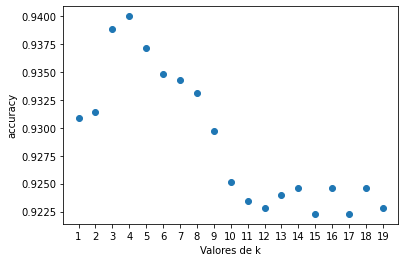

In [52]:
# ahora buscaremos el mejor valor posible para k
k_range = np.arange(1, 20)
accuracy = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    accuracy.append(knn.score(X_test, y_test))
plt.figure()
plt.xlabel('Valores de k')
plt.ylabel('accuracy')
plt.scatter(k_range, accuracy)
plt.xticks(k_range)
plt.show();

Podemos ver que el valor optimo para k es 4

In [53]:
#Reentrenamos el modelo
knn = KNeighborsClassifier(n_neighbors = 4)
knn.fit(X_train, y_train)
knn_train = knn.predict(X_train) 
knn_test = knn.predict(X_test)
training_accuracy = accuracy_score(y_train,knn_train)
test_accuracy = accuracy_score(y_test, knn_test)
print(f"Entrenamiento accuracy:   {training_accuracy:0.2%}")
print(f"Test accuracy: {test_accuracy:0.2%}")

Entrenamiento accuracy:   95.54%
Test accuracy: 94.00%


In [54]:
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix

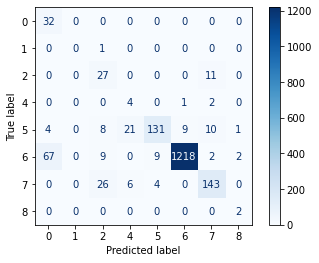

In [55]:
cm1 = plot_confusion_matrix(model_1,X_test, y_test,cmap='Blues')

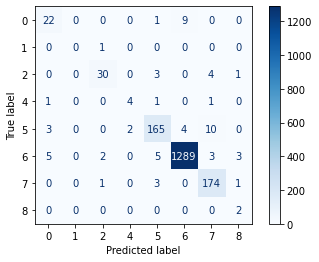

In [56]:
cm2 = plot_confusion_matrix(model_2,X_test, y_test,cmap='Blues')

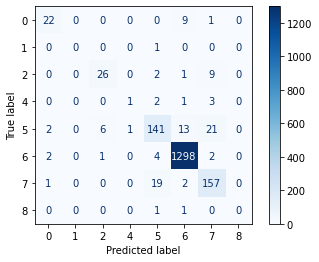

In [57]:
cm_knn= plot_confusion_matrix(knn,X_test, y_test,cmap='Blues')

In [58]:
# Revisamos los cl
print(classification_report(y_test, pred_test1))

              precision    recall  f1-score   support

           0       0.31      1.00      0.47        32
           1       0.00      0.00      0.00         1
           2       0.38      0.71      0.50        38
           4       0.13      0.57      0.21         7
           5       0.91      0.71      0.80       184
           6       0.99      0.93      0.96      1307
           7       0.85      0.80      0.82       179
           8       0.40      1.00      0.57         2

    accuracy                           0.89      1750
   macro avg       0.50      0.72      0.54      1750
weighted avg       0.94      0.89      0.91      1750



C:\Users\iaace\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\iaace\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\iaace\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [59]:
print(classification_report(y_test, pred_test2))

              precision    recall  f1-score   support

           0       0.71      0.69      0.70        32
           1       0.00      0.00      0.00         1
           2       0.88      0.79      0.83        38
           4       0.67      0.57      0.62         7
           5       0.93      0.90      0.91       184
           6       0.99      0.99      0.99      1307
           7       0.91      0.97      0.94       179
           8       0.29      1.00      0.44         2

    accuracy                           0.96      1750
   macro avg       0.67      0.74      0.68      1750
weighted avg       0.96      0.96      0.96      1750



C:\Users\iaace\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\iaace\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\iaace\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [60]:
print(classification_report(y_test, knn_test))

              precision    recall  f1-score   support

           0       0.81      0.69      0.75        32
           1       0.00      0.00      0.00         1
           2       0.79      0.68      0.73        38
           4       0.50      0.14      0.22         7
           5       0.83      0.77      0.80       184
           6       0.98      0.99      0.99      1307
           7       0.81      0.88      0.84       179
           8       0.00      0.00      0.00         2

    accuracy                           0.94      1750
   macro avg       0.59      0.52      0.54      1750
weighted avg       0.94      0.94      0.94      1750



C:\Users\iaace\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\iaace\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\iaace\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


En general podemos notar que el modelo con mejor rendimiento fue el numero 2 (Arbol de decisión) ya que analizando todas las metricas que nos entrega tanto la matriz de confusión como la función classification_report, este fue el que presento mayor precisión en la mayoria de los test.